In [1]:
import os
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from datetime import datetime

from tqdm import tqdm
import json

from sklearn.preprocessing import normalize

In [2]:
from code import model
from code.data import Dataset
from code import epoch
from code import evaluation

In [3]:
root = os.getcwd()
batch = 8
forecast = 30
samples = 5
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# device = "cpu"

# date_time = datetime.strftime(datetime.now(), "%Y-%m-%d_%H-%M")
date_time = "2021-04-09_14-40"

# Model

In [4]:
def load_checkpoint(filepath, device):

    encoder = model.Extractor(in_channels=1, out_channels=1, maxpool=False)
    decoder = model.Decoder(classes=forecast) # forcast 30 days

    predictor = model.Model(encoder=encoder, decoder=decoder).to(device)
    
        
    if os.path.exists(filepath):
        checkpoint = torch.load(filepath)
        predictor.load_state_dict(checkpoint['model_stat'])
        optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4)
        optimizer.load_state_dict(checkpoint['optimizer_stat'])
        
        print("Find pretrain.")

    else:
        optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4)
        
        print("New model and optimizer")
        
    return predictor, optimizer

In [5]:
dataset = Dataset(path=os.path.join(root, "training.csv"))

In [6]:
predictor, optimizer = load_checkpoint(
                        filepath=os.path.join(root, "results", date_time, "{}.pth".format(date_time)),
                        device=device)

Find pretrain.


In [7]:
trainloader = DataLoader(dataset, batch_size=batch, shuffle=False, num_workers=2)

In [7]:
train_info = {
       "kendal": []
}

kendal_min = 1

for e in range(5000):
    
    train_loss = epoch.train_epoch(predictor, optimizer, trainloader, device)
    pr, gt = epoch.test_epoch(predictor, dataset, device)
    
    kendal = evaluation.normalised_kendall_tau_distance(gt, pr)
    train_info["kendal"].append(kendal)
    
    print("Epoch: {}, loss = {:.5f}, kendal = {:.5f}".format(e+1, train_loss, kendal))
    
    if kendal < kendal_min:
        checkpoint = {
            'model_stat': predictor.state_dict(),
            'optimizer_stat': optimizer.state_dict(),
        }

        torch.save(checkpoint, os.path.join(root, "results", date_time, "{}.pth".format(date_time)))
        kendal_min = kendal
    with open(os.path.join(root, "results", date_time, "{}.json".format(date_time)), 'w') as f:
        json.dump(train_info, f)

145it [00:34,  4.25it/s]
1158it [01:26, 13.39it/s]


Epoch: 1, loss = 0.69415, kendal = 0.54791


145it [00:34,  4.24it/s]
1158it [01:26, 13.39it/s]


Epoch: 2, loss = 0.69381, kendal = 0.47863


145it [00:34,  4.25it/s]
1158it [01:26, 13.32it/s]

Epoch: 3, loss = 0.69318, kendal = 0.49251



145it [00:34,  4.19it/s]
1158it [01:25, 13.57it/s]


Epoch: 4, loss = 0.69310, kendal = 0.48455


145it [00:34,  4.15it/s]
1158it [01:22, 13.96it/s]


Epoch: 5, loss = 0.69249, kendal = 0.41696


145it [00:35,  4.09it/s]
1158it [01:23, 13.88it/s]

Epoch: 6, loss = 0.69180, kendal = 0.36067



145it [00:34,  4.15it/s]
1158it [01:26, 13.43it/s]

Epoch: 7, loss = 0.69116, kendal = 0.36618



145it [00:34,  4.20it/s]
1158it [01:26, 13.32it/s]

Epoch: 8, loss = 0.69071, kendal = 0.36261



145it [00:33,  4.27it/s]
1158it [01:26, 13.35it/s]


Epoch: 9, loss = 0.69002, kendal = 0.36245


145it [00:33,  4.27it/s]
1158it [01:26, 13.38it/s]

Epoch: 10, loss = 0.68926, kendal = 0.34940



145it [00:34,  4.24it/s]
1158it [01:26, 13.39it/s]


Epoch: 11, loss = 0.68858, kendal = 0.36359


145it [00:34,  4.19it/s]
1158it [01:24, 13.78it/s]


Epoch: 12, loss = 0.68806, kendal = 0.34651


145it [00:36,  4.00it/s]
1158it [01:23, 13.94it/s]

Epoch: 13, loss = 0.68734, kendal = 0.35974



145it [00:35,  4.12it/s]
1158it [01:25, 13.53it/s]

Epoch: 14, loss = 0.68657, kendal = 0.34424



145it [00:34,  4.23it/s]
1158it [01:26, 13.39it/s]


Epoch: 15, loss = 0.68606, kendal = 0.36634


145it [00:33,  4.27it/s]
1158it [01:26, 13.34it/s]


Epoch: 16, loss = 0.68540, kendal = 0.35029


145it [00:34,  4.24it/s]
1158it [01:26, 13.43it/s]

Epoch: 17, loss = 0.68467, kendal = 0.37065



145it [00:34,  4.25it/s]
1158it [01:26, 13.36it/s]


Epoch: 18, loss = 0.68423, kendal = 0.36685


145it [00:34,  4.16it/s]
1158it [01:24, 13.68it/s]


Epoch: 19, loss = 0.68335, kendal = 0.35222


145it [00:35,  4.12it/s]
1158it [01:22, 13.98it/s]

Epoch: 20, loss = 0.68278, kendal = 0.36759



145it [00:36,  3.98it/s]
1158it [01:24, 13.65it/s]

Epoch: 21, loss = 0.68189, kendal = 0.34540



145it [00:34,  4.21it/s]
1158it [01:26, 13.40it/s]

Epoch: 22, loss = 0.68126, kendal = 0.35648



145it [00:34,  4.25it/s]
1158it [01:26, 13.37it/s]

Epoch: 23, loss = 0.68086, kendal = 0.36141



145it [00:34,  4.26it/s]
1158it [01:26, 13.41it/s]


Epoch: 24, loss = 0.68001, kendal = 0.35482


145it [00:34,  4.25it/s]
1158it [01:26, 13.42it/s]

Epoch: 25, loss = 0.67967, kendal = 0.34782



145it [00:34,  4.20it/s]
1158it [01:25, 13.54it/s]

Epoch: 26, loss = 0.67884, kendal = 0.35335



145it [00:35,  4.07it/s]
1158it [01:22, 13.96it/s]


Epoch: 27, loss = 0.67827, kendal = 0.35053


145it [00:35,  4.12it/s]
1158it [01:23, 13.85it/s]


Epoch: 28, loss = 0.67784, kendal = 0.35971


145it [00:34,  4.17it/s]
1158it [01:26, 13.43it/s]

Epoch: 29, loss = 0.67756, kendal = 0.36031



145it [00:34,  4.24it/s]
1158it [01:26, 13.36it/s]

Epoch: 30, loss = 0.67706, kendal = 0.35289



145it [00:34,  4.23it/s]
1158it [01:26, 13.32it/s]

Epoch: 31, loss = 0.67664, kendal = 0.34629



145it [00:33,  4.27it/s]
1158it [01:26, 13.43it/s]

Epoch: 32, loss = 0.67612, kendal = 0.35269



145it [00:34,  4.26it/s]
1158it [01:26, 13.39it/s]


Epoch: 33, loss = 0.67612, kendal = 0.35705


145it [00:34,  4.20it/s]
1158it [01:24, 13.78it/s]


Epoch: 34, loss = 0.67587, kendal = 0.35627


145it [00:35,  4.05it/s]
1158it [01:22, 14.04it/s]

Epoch: 35, loss = 0.67509, kendal = 0.36069



145it [00:35,  4.13it/s]
1158it [01:24, 13.67it/s]


Epoch: 36, loss = 0.67538, kendal = 0.35666


145it [00:34,  4.15it/s]
1158it [01:26, 13.33it/s]

Epoch: 37, loss = 0.67453, kendal = 0.35584



145it [00:34,  4.26it/s]
1158it [01:26, 13.36it/s]


Epoch: 38, loss = 0.67418, kendal = 0.35193


145it [00:33,  4.28it/s]
1158it [01:26, 13.39it/s]


Epoch: 39, loss = 0.67379, kendal = 0.35227


145it [00:34,  4.21it/s]
1158it [01:26, 13.38it/s]

Epoch: 40, loss = 0.67333, kendal = 0.35035



145it [00:34,  4.21it/s]
1158it [01:25, 13.56it/s]

Epoch: 41, loss = 0.67375, kendal = 0.35525



145it [00:35,  4.09it/s]
1158it [01:23, 13.95it/s]


Epoch: 42, loss = 0.67335, kendal = 0.35828


145it [00:35,  4.08it/s]
1158it [01:23, 13.88it/s]

Epoch: 43, loss = 0.67305, kendal = 0.35824



145it [00:34,  4.15it/s]
1158it [01:26, 13.43it/s]


Epoch: 44, loss = 0.67302, kendal = 0.35694


145it [00:33,  4.31it/s]
1158it [01:26, 13.35it/s]


Epoch: 45, loss = 0.67257, kendal = 0.35702


145it [00:34,  4.25it/s]
1158it [01:26, 13.37it/s]


Epoch: 46, loss = 0.67192, kendal = 0.35691


145it [00:34,  4.25it/s]
1158it [01:26, 13.40it/s]

Epoch: 47, loss = 0.67245, kendal = 0.35295



145it [00:34,  4.25it/s]
1158it [01:26, 13.40it/s]


Epoch: 48, loss = 0.67219, kendal = 0.35865


145it [00:34,  4.20it/s]
1158it [01:24, 13.76it/s]

Epoch: 49, loss = 0.67211, kendal = 0.34905



145it [00:35,  4.14it/s]
1158it [01:22, 14.03it/s]

Epoch: 50, loss = 0.67184, kendal = 0.34889



145it [00:35,  4.11it/s]
1158it [01:24, 13.77it/s]

Epoch: 51, loss = 0.67172, kendal = 0.33682



145it [00:34,  4.23it/s]
1158it [01:26, 13.35it/s]


Epoch: 52, loss = 0.67128, kendal = 0.33626


145it [00:33,  4.27it/s]
1158it [01:26, 13.39it/s]


Epoch: 53, loss = 0.67074, kendal = 0.33786


145it [00:33,  4.29it/s]
1158it [01:26, 13.40it/s]

Epoch: 54, loss = 0.67057, kendal = 0.34443



145it [00:34,  4.25it/s]
1158it [01:26, 13.42it/s]


Epoch: 55, loss = 0.67000, kendal = 0.34954


145it [00:34,  4.22it/s]
1158it [01:25, 13.49it/s]


Epoch: 56, loss = 0.67098, kendal = 0.35688


145it [00:34,  4.16it/s]
1158it [01:23, 13.84it/s]


Epoch: 57, loss = 0.66969, kendal = 0.34771


145it [00:35,  4.13it/s]
1158it [01:22, 13.98it/s]

Epoch: 58, loss = 0.66994, kendal = 0.35413



145it [00:34,  4.15it/s]
1158it [01:24, 13.64it/s]

Epoch: 59, loss = 0.66957, kendal = 0.35785



145it [00:34,  4.16it/s]
1158it [01:26, 13.37it/s]

Epoch: 60, loss = 0.67008, kendal = 0.35198



145it [00:33,  4.31it/s]
1158it [01:26, 13.40it/s]

Epoch: 61, loss = 0.66951, kendal = 0.34869



145it [00:34,  4.24it/s]
1158it [01:26, 13.45it/s]

Epoch: 62, loss = 0.66987, kendal = 0.35074



145it [00:34,  4.24it/s]
1158it [01:26, 13.40it/s]


Epoch: 63, loss = 0.66938, kendal = 0.35998


145it [00:34,  4.21it/s]
1158it [01:25, 13.62it/s]

Epoch: 64, loss = 0.66945, kendal = 0.35764



145it [00:34,  4.16it/s]
1158it [01:22, 13.95it/s]

Epoch: 65, loss = 0.66924, kendal = 0.36504



145it [00:35,  4.12it/s]
1158it [01:23, 13.90it/s]

Epoch: 66, loss = 0.66881, kendal = 0.34619



145it [00:34,  4.17it/s]
1158it [01:25, 13.50it/s]


Epoch: 67, loss = 0.66797, kendal = 0.32965


145it [00:34,  4.23it/s]
1158it [01:26, 13.37it/s]


Epoch: 68, loss = 0.66834, kendal = 0.36819


145it [00:34,  4.21it/s]
1158it [01:26, 13.35it/s]


Epoch: 69, loss = 0.66820, kendal = 0.35249


145it [00:33,  4.28it/s]
1158it [01:26, 13.42it/s]

Epoch: 70, loss = 0.66725, kendal = 0.37143



145it [00:33,  4.27it/s]
1158it [01:26, 13.36it/s]

Epoch: 71, loss = 0.66781, kendal = 0.38959



145it [00:34,  4.21it/s]
1158it [01:24, 13.73it/s]

Epoch: 72, loss = 0.66811, kendal = 0.35911



145it [00:34,  4.16it/s]
1158it [01:22, 14.09it/s]

Epoch: 73, loss = 0.66699, kendal = 0.37277



145it [00:34,  4.15it/s]
1158it [01:23, 13.86it/s]

Epoch: 74, loss = 0.66753, kendal = 0.36223



145it [00:35,  4.08it/s]
1158it [01:26, 13.42it/s]

Epoch: 75, loss = 0.66610, kendal = 0.36856



145it [00:33,  4.31it/s]
1158it [01:26, 13.35it/s]


Epoch: 76, loss = 0.66596, kendal = 0.39582


145it [00:34,  4.26it/s]
1158it [01:26, 13.44it/s]

Epoch: 77, loss = 0.66590, kendal = 0.37666



145it [00:33,  4.30it/s]
1158it [01:26, 13.41it/s]


Epoch: 78, loss = 0.66509, kendal = 0.36559


145it [00:34,  4.26it/s]
1158it [01:26, 13.37it/s]


Epoch: 79, loss = 0.66474, kendal = 0.37624


145it [00:34,  4.19it/s]
1158it [01:23, 13.79it/s]


Epoch: 80, loss = 0.66499, kendal = 0.36986


145it [00:34,  4.15it/s]
1158it [01:22, 14.08it/s]


Epoch: 81, loss = 0.66569, kendal = 0.34107


145it [00:35,  4.13it/s]
1158it [01:23, 13.80it/s]

Epoch: 82, loss = 0.66434, kendal = 0.37807



145it [00:34,  4.20it/s]
1158it [01:26, 13.37it/s]


Epoch: 83, loss = 0.66465, kendal = 0.36998


145it [00:33,  4.28it/s]
1158it [01:26, 13.38it/s]


Epoch: 84, loss = 0.66400, kendal = 0.38051


145it [00:34,  4.23it/s]
1158it [01:26, 13.43it/s]

Epoch: 85, loss = 0.66460, kendal = 0.31831



145it [00:34,  4.25it/s]
1158it [01:26, 13.43it/s]

Epoch: 86, loss = 0.66287, kendal = 0.38244



145it [00:34,  4.25it/s]
1158it [01:26, 13.40it/s]

Epoch: 87, loss = 0.66337, kendal = 0.31958



145it [00:35,  4.10it/s]
1158it [01:23, 13.89it/s]


Epoch: 88, loss = 0.66302, kendal = 0.36321


145it [00:35,  4.12it/s]
1158it [01:22, 13.97it/s]

Epoch: 89, loss = 0.66283, kendal = 0.38673



145it [00:35,  4.03it/s]
1158it [01:25, 13.60it/s]

Epoch: 90, loss = 0.66162, kendal = 0.40364



145it [00:34,  4.24it/s]
1158it [01:26, 13.43it/s]


Epoch: 91, loss = 0.66126, kendal = 0.40403


145it [00:34,  4.22it/s]
1158it [01:26, 13.37it/s]


Epoch: 92, loss = 0.66007, kendal = 0.39409


145it [00:33,  4.27it/s]
1158it [01:25, 13.47it/s]

Epoch: 93, loss = 0.66328, kendal = 0.37092



145it [00:33,  4.28it/s]
1158it [01:26, 13.40it/s]


Epoch: 94, loss = 0.65940, kendal = 0.39485


145it [00:34,  4.21it/s]
1158it [01:25, 13.54it/s]


Epoch: 95, loss = 0.65923, kendal = 0.41219


145it [00:35,  4.09it/s]
1158it [01:22, 13.99it/s]


Epoch: 96, loss = 0.65911, kendal = 0.39573


145it [00:34,  4.15it/s]
1158it [01:23, 13.93it/s]

Epoch: 97, loss = 0.66535, kendal = 0.40797



145it [00:35,  4.13it/s]
1158it [01:25, 13.59it/s]

Epoch: 98, loss = 0.65980, kendal = 0.39955



145it [00:34,  4.24it/s]
1158it [01:26, 13.40it/s]

Epoch: 99, loss = 0.65822, kendal = 0.40053



145it [00:34,  4.25it/s]
1158it [01:26, 13.40it/s]

Epoch: 100, loss = 0.65582, kendal = 0.40194



145it [00:33,  4.29it/s]
1158it [01:25, 13.51it/s]


Epoch: 101, loss = 0.65473, kendal = 0.38501


145it [00:33,  4.31it/s]
1158it [01:26, 13.46it/s]


Epoch: 102, loss = 0.65458, kendal = 0.39502


145it [00:34,  4.23it/s]
1158it [01:25, 13.58it/s]

Epoch: 103, loss = 0.66488, kendal = 0.44891



145it [00:34,  4.16it/s]
1158it [01:22, 14.01it/s]

Epoch: 104, loss = 0.66836, kendal = 0.37959



145it [00:35,  4.13it/s]
1158it [01:23, 13.90it/s]

Epoch: 105, loss = 0.66193, kendal = 0.39232



145it [00:34,  4.14it/s]
1158it [01:25, 13.52it/s]

Epoch: 106, loss = 0.65700, kendal = 0.42150



145it [00:33,  4.28it/s]
1158it [01:26, 13.42it/s]


Epoch: 107, loss = 0.65355, kendal = 0.41218


145it [00:33,  4.30it/s]
1158it [01:25, 13.47it/s]


Epoch: 108, loss = 0.65240, kendal = 0.40982


145it [00:34,  4.24it/s]
1158it [01:26, 13.46it/s]


Epoch: 109, loss = 0.65164, kendal = 0.35233


145it [00:33,  4.29it/s]
1158it [01:26, 13.42it/s]


Epoch: 110, loss = 0.65183, kendal = 0.37249


145it [00:34,  4.15it/s]
1158it [01:24, 13.66it/s]

Epoch: 111, loss = 0.64956, kendal = 0.39238



145it [00:34,  4.17it/s]
1158it [01:22, 13.99it/s]


Epoch: 112, loss = 0.65007, kendal = 0.44259


145it [00:34,  4.14it/s]
1158it [01:23, 13.92it/s]

Epoch: 113, loss = 0.64825, kendal = 0.40690



145it [00:35,  4.12it/s]
1158it [01:25, 13.56it/s]

Epoch: 114, loss = 0.65015, kendal = 0.40157



145it [00:34,  4.25it/s]
1158it [01:26, 13.44it/s]


Epoch: 115, loss = 0.64728, kendal = 0.33214


145it [00:33,  4.29it/s]
1158it [01:26, 13.41it/s]


Epoch: 116, loss = 0.64550, kendal = 0.39779


145it [00:34,  4.26it/s]
1158it [01:25, 13.50it/s]


Epoch: 117, loss = 0.64482, kendal = 0.39675


145it [00:33,  4.27it/s]
1158it [01:26, 13.41it/s]

Epoch: 118, loss = 0.64455, kendal = 0.45869



145it [00:34,  4.23it/s]
1158it [01:24, 13.65it/s]


Epoch: 119, loss = 0.65292, kendal = 0.39032


145it [00:34,  4.17it/s]
1158it [01:22, 14.00it/s]


Epoch: 120, loss = 0.67289, kendal = 0.44773


145it [00:35,  4.11it/s]
1158it [01:22, 13.98it/s]

Epoch: 121, loss = 0.66543, kendal = 0.42612



145it [00:35,  4.13it/s]
1158it [01:25, 13.56it/s]

Epoch: 122, loss = 0.66205, kendal = 0.42231



145it [00:34,  4.23it/s]
1158it [01:26, 13.45it/s]


Epoch: 123, loss = 0.65462, kendal = 0.40646


145it [00:34,  4.25it/s]
1158it [01:26, 13.43it/s]


Epoch: 124, loss = 0.65184, kendal = 0.43183


145it [00:34,  4.25it/s]
1158it [01:26, 13.44it/s]


Epoch: 125, loss = 0.64855, kendal = 0.36511


145it [00:33,  4.30it/s]
1158it [01:26, 13.43it/s]

Epoch: 126, loss = 0.64714, kendal = 0.41867



145it [00:34,  4.21it/s]
1158it [01:25, 13.62it/s]


Epoch: 127, loss = 0.64520, kendal = 0.44411


145it [00:34,  4.17it/s]
1158it [01:22, 13.97it/s]


Epoch: 128, loss = 0.64293, kendal = 0.42358


145it [00:34,  4.18it/s]
1158it [01:22, 13.96it/s]

Epoch: 129, loss = 0.64466, kendal = 0.42282



145it [00:35,  4.06it/s]
1158it [01:25, 13.55it/s]

Epoch: 130, loss = 0.64073, kendal = 0.44178



145it [00:34,  4.22it/s]
1158it [01:26, 13.43it/s]


Epoch: 131, loss = 0.64063, kendal = 0.41478


145it [00:34,  4.26it/s]
1158it [01:26, 13.36it/s]


Epoch: 132, loss = 0.64126, kendal = 0.42442


145it [00:34,  4.25it/s]
1158it [01:26, 13.45it/s]


Epoch: 133, loss = 0.63959, kendal = 0.38487


145it [00:33,  4.27it/s]
1158it [01:26, 13.42it/s]

Epoch: 134, loss = 0.63817, kendal = 0.40919



145it [00:34,  4.24it/s]
1158it [01:24, 13.63it/s]

Epoch: 135, loss = 0.63782, kendal = 0.40495



145it [00:34,  4.17it/s]
1158it [01:22, 14.02it/s]

Epoch: 136, loss = 0.63533, kendal = 0.42151



145it [00:35,  4.14it/s]
1158it [01:22, 13.97it/s]

Epoch: 137, loss = 0.63877, kendal = 0.43479



145it [00:35,  4.04it/s]
1158it [01:25, 13.49it/s]

Epoch: 138, loss = 0.63614, kendal = 0.39430



145it [00:33,  4.31it/s]
1158it [01:26, 13.42it/s]


Epoch: 139, loss = 0.65142, kendal = 0.42678


145it [00:33,  4.27it/s]
1158it [01:26, 13.42it/s]


Epoch: 140, loss = 0.65714, kendal = 0.38712


145it [00:34,  4.23it/s]
1158it [01:25, 13.48it/s]


Epoch: 141, loss = 0.66621, kendal = 0.34161


145it [00:34,  4.23it/s]
1158it [01:26, 13.40it/s]

Epoch: 142, loss = 0.66307, kendal = 0.34034



145it [00:34,  4.16it/s]
1158it [01:24, 13.67it/s]

Epoch: 143, loss = 0.65826, kendal = 0.38964



145it [00:34,  4.16it/s]
1158it [01:22, 14.07it/s]

Epoch: 144, loss = 0.64904, kendal = 0.40346



145it [00:35,  4.09it/s]
1158it [01:23, 13.91it/s]

Epoch: 145, loss = 0.64588, kendal = 0.39074



145it [00:34,  4.19it/s]
1158it [01:25, 13.48it/s]

Epoch: 146, loss = 0.64406, kendal = 0.40612



145it [00:34,  4.24it/s]
1158it [01:26, 13.45it/s]

Epoch: 147, loss = 0.64644, kendal = 0.41376



145it [00:34,  4.25it/s]
1158it [01:26, 13.45it/s]

Epoch: 148, loss = 0.66458, kendal = 0.42917



145it [00:34,  4.26it/s]
1158it [01:25, 13.47it/s]

Epoch: 149, loss = 0.65443, kendal = 0.40517



145it [00:34,  4.26it/s]
1158it [01:26, 13.41it/s]


Epoch: 150, loss = 0.64682, kendal = 0.43541


145it [00:34,  4.17it/s]
1158it [01:24, 13.68it/s]


Epoch: 151, loss = 0.64476, kendal = 0.41242


145it [00:35,  4.11it/s]
1158it [01:22, 14.05it/s]

Epoch: 152, loss = 0.64763, kendal = 0.43237



145it [00:35,  4.07it/s]
1158it [01:23, 13.86it/s]

Epoch: 153, loss = 0.64349, kendal = 0.43456



145it [00:34,  4.20it/s]
1158it [01:26, 13.42it/s]

Epoch: 154, loss = 0.64116, kendal = 0.43311



145it [00:33,  4.28it/s]
1158it [01:26, 13.39it/s]

Epoch: 155, loss = 0.64529, kendal = 0.31585



145it [00:33,  4.27it/s]
1158it [01:26, 13.38it/s]


Epoch: 156, loss = 0.65923, kendal = 0.35833


145it [00:33,  4.27it/s]
1158it [01:26, 13.44it/s]

Epoch: 157, loss = 0.64471, kendal = 0.41337



145it [00:34,  4.24it/s]
1158it [01:26, 13.38it/s]

Epoch: 158, loss = 0.63692, kendal = 0.41853



145it [00:35,  4.12it/s]
1158it [01:23, 13.82it/s]

Epoch: 159, loss = 0.64411, kendal = 0.41144



145it [00:34,  4.15it/s]
1158it [01:22, 14.08it/s]

Epoch: 160, loss = 0.63015, kendal = 0.42577



145it [00:35,  4.03it/s]
1158it [01:23, 13.81it/s]

Epoch: 161, loss = 0.62990, kendal = 0.42353



145it [00:34,  4.21it/s]
1158it [01:26, 13.38it/s]


Epoch: 162, loss = 0.63500, kendal = 0.40895


145it [00:33,  4.28it/s]
1158it [01:26, 13.40it/s]


Epoch: 163, loss = 0.63409, kendal = 0.41155


145it [00:34,  4.24it/s]
1158it [01:26, 13.43it/s]


Epoch: 164, loss = 0.63124, kendal = 0.40935


145it [00:33,  4.30it/s]
1158it [01:26, 13.44it/s]


Epoch: 165, loss = 0.62394, kendal = 0.36229


145it [00:34,  4.24it/s]
1158it [01:26, 13.40it/s]


Epoch: 166, loss = 0.62624, kendal = 0.38701


145it [00:34,  4.17it/s]
1158it [01:23, 13.83it/s]


Epoch: 167, loss = 0.61926, kendal = 0.35664


145it [00:35,  4.06it/s]
1158it [01:22, 14.06it/s]

Epoch: 168, loss = 0.61378, kendal = 0.36953



145it [00:35,  4.11it/s]
1158it [01:24, 13.72it/s]

Epoch: 169, loss = 0.65584, kendal = 0.46184



145it [00:34,  4.21it/s]
1158it [01:26, 13.37it/s]


Epoch: 170, loss = 0.64454, kendal = 0.43854


145it [00:34,  4.25it/s]
1158it [01:26, 13.43it/s]

Epoch: 171, loss = 0.63557, kendal = 0.37611



145it [00:33,  4.27it/s]
1158it [01:26, 13.45it/s]


Epoch: 172, loss = 0.61788, kendal = 0.37079


145it [00:33,  4.29it/s]
1158it [01:26, 13.44it/s]

Epoch: 173, loss = 0.61993, kendal = 0.37021



145it [00:34,  4.24it/s]
1158it [01:25, 13.53it/s]

Epoch: 174, loss = 0.61321, kendal = 0.36788



145it [00:34,  4.20it/s]
1158it [01:23, 13.87it/s]


Epoch: 175, loss = 0.61666, kendal = 0.38597


145it [00:35,  4.13it/s]
1158it [01:22, 14.04it/s]

Epoch: 176, loss = 0.62149, kendal = 0.37483



145it [00:34,  4.22it/s]
1158it [01:24, 13.70it/s]

Epoch: 177, loss = 0.60454, kendal = 0.37583



145it [00:34,  4.15it/s]
1158it [01:26, 13.39it/s]

Epoch: 178, loss = 0.59899, kendal = 0.33711



145it [00:33,  4.27it/s]
1158it [01:25, 13.47it/s]

Epoch: 179, loss = 0.59761, kendal = 0.38351



145it [00:34,  4.23it/s]
1158it [01:26, 13.38it/s]

Epoch: 180, loss = 0.59479, kendal = 0.36944



145it [00:34,  4.25it/s]
1158it [01:26, 13.40it/s]


Epoch: 181, loss = 0.61107, kendal = 0.39147


145it [00:33,  4.28it/s]
1158it [01:25, 13.49it/s]


Epoch: 182, loss = 0.59193, kendal = 0.38868


145it [00:34,  4.25it/s]
1158it [01:23, 13.87it/s]

Epoch: 183, loss = 0.58996, kendal = 0.36946



145it [00:34,  4.16it/s]
1158it [01:22, 14.10it/s]

Epoch: 184, loss = 0.61098, kendal = 0.35411



145it [00:34,  4.15it/s]
1158it [01:24, 13.74it/s]

Epoch: 185, loss = 0.68700, kendal = 0.32172



145it [00:34,  4.20it/s]
1158it [01:26, 13.41it/s]

Epoch: 186, loss = 0.63967, kendal = 0.38442



145it [00:33,  4.27it/s]
1158it [01:26, 13.41it/s]

Epoch: 187, loss = 0.62996, kendal = 0.41316



145it [00:34,  4.25it/s]
1158it [01:26, 13.41it/s]


Epoch: 188, loss = 0.61601, kendal = 0.34470


145it [00:34,  4.23it/s]
1158it [01:26, 13.43it/s]


Epoch: 189, loss = 0.60355, kendal = 0.38532


145it [00:34,  4.25it/s]
1158it [01:25, 13.47it/s]

Epoch: 190, loss = 0.59376, kendal = 0.36770



145it [00:34,  4.18it/s]
1158it [01:23, 13.87it/s]


Epoch: 191, loss = 0.62209, kendal = 0.35840


145it [00:34,  4.16it/s]
1158it [01:22, 14.06it/s]

Epoch: 192, loss = 0.61234, kendal = 0.41234



145it [00:35,  4.05it/s]
1158it [01:24, 13.67it/s]

Epoch: 193, loss = 0.58957, kendal = 0.35849



145it [00:34,  4.22it/s]
1158it [01:26, 13.39it/s]

Epoch: 194, loss = 0.58311, kendal = 0.36548



145it [00:33,  4.29it/s]
1158it [01:26, 13.41it/s]


Epoch: 195, loss = 0.57846, kendal = 0.36249


145it [00:34,  4.25it/s]
1158it [01:26, 13.41it/s]


Epoch: 196, loss = 0.57936, kendal = 0.35995


145it [00:34,  4.26it/s]
1158it [01:26, 13.44it/s]

Epoch: 197, loss = 0.57470, kendal = 0.36105



145it [00:33,  4.28it/s]
1158it [01:25, 13.49it/s]

Epoch: 198, loss = 0.57473, kendal = 0.37104



145it [00:34,  4.18it/s]
1158it [01:23, 13.88it/s]


Epoch: 199, loss = 0.56947, kendal = 0.31358


145it [00:35,  4.10it/s]
1158it [01:22, 14.08it/s]

Epoch: 200, loss = 0.56785, kendal = 0.37459



145it [00:35,  4.14it/s]
1158it [01:24, 13.64it/s]

Epoch: 201, loss = 0.58884, kendal = 0.37126



145it [00:34,  4.17it/s]
1158it [01:26, 13.41it/s]

Epoch: 202, loss = 0.64677, kendal = 0.37024



145it [00:33,  4.31it/s]
1158it [01:26, 13.41it/s]

Epoch: 203, loss = 0.62127, kendal = 0.38581



145it [00:34,  4.22it/s]
1158it [01:26, 13.42it/s]


Epoch: 204, loss = 0.59820, kendal = 0.36176


145it [00:34,  4.26it/s]
1158it [01:26, 13.45it/s]

Epoch: 205, loss = 0.58332, kendal = 0.36995



145it [00:33,  4.29it/s]
1158it [01:25, 13.49it/s]


Epoch: 206, loss = 0.57751, kendal = 0.36906


145it [00:34,  4.20it/s]
1158it [01:23, 13.91it/s]

Epoch: 207, loss = 0.56699, kendal = 0.37760



145it [00:34,  4.17it/s]
1158it [01:22, 14.06it/s]

Epoch: 208, loss = 0.56698, kendal = 0.35356



145it [00:35,  4.11it/s]
1158it [01:24, 13.67it/s]

Epoch: 209, loss = 0.56892, kendal = 0.35728



145it [00:34,  4.15it/s]
1158it [01:26, 13.42it/s]


Epoch: 210, loss = 0.57952, kendal = 0.34370


145it [00:33,  4.28it/s]
1158it [01:26, 13.41it/s]


Epoch: 211, loss = 0.58866, kendal = 0.34034


145it [00:34,  4.23it/s]
1158it [01:26, 13.44it/s]


Epoch: 212, loss = 0.59331, kendal = 0.33877


145it [00:33,  4.27it/s]
1158it [01:26, 13.45it/s]


Epoch: 213, loss = 0.58059, kendal = 0.32948


145it [00:33,  4.27it/s]
1158it [01:25, 13.48it/s]

Epoch: 214, loss = 0.56466, kendal = 0.34328



145it [00:34,  4.15it/s]
1158it [01:23, 13.89it/s]


Epoch: 215, loss = 0.56168, kendal = 0.33877


145it [00:35,  4.10it/s]
1158it [01:22, 14.01it/s]

Epoch: 216, loss = 0.55757, kendal = 0.34136



145it [00:34,  4.15it/s]
1158it [01:24, 13.66it/s]

Epoch: 217, loss = 0.55374, kendal = 0.33717



145it [00:34,  4.24it/s]
1158it [01:26, 13.39it/s]


Epoch: 218, loss = 0.55350, kendal = 0.33806


145it [00:33,  4.28it/s]
1158it [01:26, 13.42it/s]

Epoch: 219, loss = 0.55059, kendal = 0.32825



145it [00:33,  4.29it/s]
1158it [01:26, 13.46it/s]


Epoch: 220, loss = 0.55336, kendal = 0.32869


145it [00:34,  4.26it/s]
1158it [01:26, 13.42it/s]


Epoch: 221, loss = 0.55361, kendal = 0.33928


145it [00:33,  4.27it/s]
1158it [01:25, 13.55it/s]


Epoch: 222, loss = 0.55459, kendal = 0.35224


145it [00:33,  4.28it/s]
1158it [01:23, 13.87it/s]


Epoch: 223, loss = 0.55253, kendal = 0.32468


145it [00:34,  4.15it/s]
1158it [01:22, 14.07it/s]


Epoch: 224, loss = 0.56439, kendal = 0.33464


145it [00:36,  4.02it/s]
1158it [01:24, 13.65it/s]

Epoch: 225, loss = 0.57840, kendal = 0.32385



145it [00:34,  4.19it/s]
1158it [01:26, 13.41it/s]


Epoch: 226, loss = 0.57324, kendal = 0.36505


145it [00:34,  4.26it/s]
1158it [01:26, 13.41it/s]

Epoch: 227, loss = 0.55836, kendal = 0.35525



145it [00:33,  4.27it/s]
1158it [01:26, 13.44it/s]


Epoch: 228, loss = 0.55999, kendal = 0.39268


145it [00:33,  4.27it/s]
1158it [01:26, 13.42it/s]


Epoch: 229, loss = 0.56857, kendal = 0.33907


145it [00:34,  4.23it/s]
1158it [01:25, 13.52it/s]


Epoch: 230, loss = 0.62331, kendal = 0.35383


145it [00:34,  4.17it/s]
1158it [01:23, 13.87it/s]


Epoch: 231, loss = 0.64612, kendal = 0.36146


145it [00:35,  4.11it/s]
1158it [01:22, 14.00it/s]

Epoch: 232, loss = 0.57486, kendal = 0.35707



145it [00:35,  4.14it/s]
1158it [01:24, 13.66it/s]

Epoch: 233, loss = 0.56203, kendal = 0.36695



145it [00:34,  4.18it/s]
1158it [01:26, 13.41it/s]


Epoch: 234, loss = 0.54578, kendal = 0.35252


145it [00:33,  4.27it/s]
1158it [01:26, 13.42it/s]

Epoch: 235, loss = 0.54471, kendal = 0.35751



145it [00:33,  4.29it/s]
1158it [01:26, 13.42it/s]

Epoch: 236, loss = 0.54350, kendal = 0.36289



145it [00:34,  4.25it/s]
1158it [01:26, 13.39it/s]


Epoch: 237, loss = 0.54124, kendal = 0.35498


145it [00:34,  4.25it/s]
1158it [01:25, 13.52it/s]


Epoch: 238, loss = 0.53528, kendal = 0.35774


145it [00:34,  4.19it/s]
1158it [01:23, 13.91it/s]


Epoch: 239, loss = 0.53951, kendal = 0.36159


145it [00:35,  4.09it/s]
1158it [01:22, 13.99it/s]

Epoch: 240, loss = 0.53665, kendal = 0.36373



145it [00:34,  4.15it/s]
1158it [01:25, 13.56it/s]

Epoch: 241, loss = 0.53774, kendal = 0.35630



145it [00:34,  4.24it/s]
1158it [01:26, 13.41it/s]


Epoch: 242, loss = 0.53401, kendal = 0.35760


145it [00:34,  4.26it/s]
1158it [01:26, 13.37it/s]

Epoch: 243, loss = 0.53098, kendal = 0.37569



145it [00:34,  4.25it/s]
1158it [01:26, 13.45it/s]

Epoch: 244, loss = 0.56935, kendal = 0.34547



145it [00:33,  4.31it/s]
1158it [01:26, 13.42it/s]


Epoch: 245, loss = 0.58984, kendal = 0.32154


145it [00:34,  4.17it/s]
1158it [01:24, 13.63it/s]

Epoch: 246, loss = 0.58447, kendal = 0.34029



145it [00:34,  4.17it/s]
1158it [01:22, 14.03it/s]


Epoch: 247, loss = 0.58403, kendal = 0.37991


145it [00:34,  4.15it/s]
1158it [01:23, 13.93it/s]

Epoch: 248, loss = 0.56697, kendal = 0.41181



145it [00:35,  4.12it/s]
1158it [01:25, 13.55it/s]

Epoch: 249, loss = 0.55346, kendal = 0.39841



145it [00:34,  4.26it/s]
1158it [01:26, 13.41it/s]


Epoch: 250, loss = 0.54226, kendal = 0.32834


145it [00:33,  4.27it/s]
1158it [01:26, 13.43it/s]


Epoch: 251, loss = 0.55672, kendal = 0.40091


145it [00:34,  4.23it/s]
1158it [01:26, 13.43it/s]

Epoch: 252, loss = 0.54834, kendal = 0.37628



145it [00:33,  4.28it/s]
1158it [01:26, 13.38it/s]

Epoch: 253, loss = 0.53655, kendal = 0.37230



145it [00:34,  4.21it/s]
1158it [01:24, 13.65it/s]


Epoch: 254, loss = 0.52904, kendal = 0.39501


145it [00:35,  4.14it/s]
1158it [01:22, 14.00it/s]


Epoch: 255, loss = 0.54445, kendal = 0.35606


145it [00:35,  4.14it/s]
1158it [01:23, 13.93it/s]

Epoch: 256, loss = 0.53118, kendal = 0.39740



145it [00:34,  4.17it/s]
1158it [01:26, 13.45it/s]

Epoch: 257, loss = 0.54250, kendal = 0.42057



145it [00:33,  4.27it/s]
1158it [01:26, 13.38it/s]

Epoch: 258, loss = 0.53784, kendal = 0.41426



145it [00:34,  4.23it/s]
1158it [01:26, 13.39it/s]

Epoch: 259, loss = 0.53043, kendal = 0.42567



145it [00:33,  4.27it/s]
1158it [01:26, 13.46it/s]

Epoch: 260, loss = 0.54748, kendal = 0.38637



145it [00:33,  4.27it/s]
1158it [01:25, 13.50it/s]

Epoch: 261, loss = 0.53566, kendal = 0.39054



145it [00:34,  4.20it/s]
1158it [01:24, 13.69it/s]

Epoch: 262, loss = 0.52697, kendal = 0.41014



145it [00:35,  4.07it/s]
1158it [01:22, 14.03it/s]

Epoch: 263, loss = 0.52947, kendal = 0.41275



145it [00:34,  4.16it/s]
1158it [01:24, 13.74it/s]

Epoch: 264, loss = 0.52989, kendal = 0.37724



145it [00:34,  4.17it/s]
1158it [01:26, 13.41it/s]


Epoch: 265, loss = 0.52765, kendal = 0.33637


145it [00:34,  4.26it/s]
1158it [01:26, 13.39it/s]


Epoch: 266, loss = 0.53138, kendal = 0.31139


145it [00:33,  4.27it/s]
1158it [01:26, 13.38it/s]


Epoch: 267, loss = 0.54066, kendal = 0.40850


145it [00:34,  4.26it/s]
1158it [01:26, 13.40it/s]


Epoch: 268, loss = 0.53008, kendal = 0.39492


145it [00:33,  4.29it/s]
1158it [01:26, 13.43it/s]


Epoch: 269, loss = 0.53312, kendal = 0.26789


145it [00:34,  4.20it/s]
1158it [01:23, 13.83it/s]


Epoch: 270, loss = 0.52606, kendal = 0.38886


145it [00:34,  4.15it/s]
1158it [01:22, 14.05it/s]

Epoch: 271, loss = 0.51968, kendal = 0.36243



145it [00:35,  4.10it/s]
1158it [01:24, 13.67it/s]

Epoch: 272, loss = 0.59405, kendal = 0.36503



145it [00:34,  4.21it/s]
1158it [01:26, 13.42it/s]


Epoch: 273, loss = 0.56632, kendal = 0.34736


145it [00:33,  4.28it/s]
1158it [01:26, 13.36it/s]

Epoch: 274, loss = 0.52877, kendal = 0.35362



145it [00:34,  4.26it/s]
1158it [01:26, 13.42it/s]


Epoch: 275, loss = 0.52414, kendal = 0.40078


145it [00:34,  4.25it/s]
1158it [01:26, 13.40it/s]


Epoch: 276, loss = 0.52804, kendal = 0.34571


145it [00:34,  4.26it/s]
1158it [01:25, 13.47it/s]


Epoch: 277, loss = 0.51653, kendal = 0.38164


145it [00:34,  4.17it/s]
1158it [01:23, 13.85it/s]


Epoch: 278, loss = 0.52310, kendal = 0.32586


145it [00:35,  4.10it/s]
1158it [01:23, 13.95it/s]

Epoch: 279, loss = 0.52041, kendal = 0.35614



145it [00:36,  4.03it/s]
1158it [01:25, 13.59it/s]

Epoch: 280, loss = 0.50968, kendal = 0.37315



145it [00:34,  4.20it/s]
1158it [01:26, 13.39it/s]

Epoch: 281, loss = 0.51471, kendal = 0.36404



145it [00:34,  4.25it/s]
1158it [01:26, 13.38it/s]

Epoch: 282, loss = 0.52053, kendal = 0.37817



145it [00:34,  4.25it/s]
1158it [01:26, 13.45it/s]

Epoch: 283, loss = 0.52170, kendal = 0.38073



145it [00:33,  4.30it/s]
1158it [01:26, 13.39it/s]

Epoch: 284, loss = 0.51767, kendal = 0.33448



145it [00:34,  4.22it/s]
1158it [01:24, 13.64it/s]


Epoch: 285, loss = 0.60925, kendal = 0.35152


145it [00:34,  4.19it/s]
1158it [01:22, 14.00it/s]


Epoch: 286, loss = 0.53452, kendal = 0.38505


145it [00:34,  4.14it/s]
1158it [01:23, 13.89it/s]

Epoch: 287, loss = 0.52180, kendal = 0.37871



145it [00:35,  4.13it/s]
1158it [01:25, 13.48it/s]

Epoch: 288, loss = 0.51066, kendal = 0.38337



145it [00:33,  4.30it/s]
1158it [01:26, 13.36it/s]


Epoch: 289, loss = 0.50615, kendal = 0.37109


145it [00:34,  4.24it/s]
1158it [01:26, 13.37it/s]


Epoch: 290, loss = 0.50191, kendal = 0.39332


145it [00:34,  4.25it/s]
1158it [01:26, 13.40it/s]


Epoch: 291, loss = 0.50207, kendal = 0.39700


145it [00:33,  4.28it/s]
1158it [01:26, 13.38it/s]

Epoch: 292, loss = 0.51558, kendal = 0.33381



145it [00:35,  4.09it/s]
1158it [01:23, 13.79it/s]


Epoch: 293, loss = 0.51932, kendal = 0.40314


145it [00:34,  4.16it/s]
1158it [01:22, 14.06it/s]

Epoch: 294, loss = 0.51558, kendal = 0.31578



145it [00:34,  4.15it/s]
1158it [01:24, 13.71it/s]

Epoch: 295, loss = 0.51648, kendal = 0.32463



145it [00:34,  4.15it/s]
1158it [01:26, 13.37it/s]

Epoch: 296, loss = 0.50940, kendal = 0.37281



145it [00:34,  4.24it/s]
1158it [01:26, 13.40it/s]

Epoch: 297, loss = 0.49767, kendal = 0.32926



145it [00:34,  4.23it/s]
1158it [01:26, 13.38it/s]


Epoch: 298, loss = 0.49909, kendal = 0.38712


145it [00:34,  4.26it/s]
1158it [01:26, 13.41it/s]


Epoch: 299, loss = 0.51028, kendal = 0.29565


145it [00:34,  4.22it/s]
1158it [01:25, 13.53it/s]

Epoch: 300, loss = 0.50671, kendal = 0.25257



145it [00:35,  4.08it/s]
1158it [01:23, 13.92it/s]


Epoch: 301, loss = 0.50214, kendal = 0.38079


145it [00:36,  4.01it/s]
1158it [01:23, 13.83it/s]

Epoch: 302, loss = 0.50854, kendal = 0.28376



145it [00:34,  4.17it/s]
1158it [01:25, 13.49it/s]

Epoch: 303, loss = 0.50841, kendal = 0.33437



145it [00:34,  4.26it/s]
1158it [01:26, 13.40it/s]

Epoch: 304, loss = 0.49239, kendal = 0.31827



145it [00:33,  4.32it/s]
1158it [01:26, 13.41it/s]


Epoch: 305, loss = 0.50128, kendal = 0.37229


145it [00:33,  4.28it/s]
1158it [01:26, 13.41it/s]


Epoch: 306, loss = 0.50507, kendal = 0.34680


145it [00:34,  4.21it/s]
1158it [01:26, 13.37it/s]


Epoch: 307, loss = 0.50609, kendal = 0.38992


145it [00:34,  4.22it/s]
1158it [01:24, 13.72it/s]


Epoch: 308, loss = 0.51405, kendal = 0.27480


145it [00:34,  4.15it/s]
1158it [01:22, 14.06it/s]

Epoch: 309, loss = 0.49536, kendal = 0.34888



145it [00:35,  4.10it/s]
1158it [01:23, 13.81it/s]

Epoch: 310, loss = 0.48991, kendal = 0.30640



145it [00:34,  4.22it/s]
1158it [01:26, 13.39it/s]

Epoch: 311, loss = 0.49041, kendal = 0.35200



145it [00:34,  4.25it/s]
1158it [01:26, 13.36it/s]


Epoch: 312, loss = 0.49607, kendal = 0.32362


145it [00:34,  4.25it/s]
1158it [01:26, 13.35it/s]

Epoch: 313, loss = 0.56609, kendal = 0.34771



145it [00:33,  4.30it/s]
1158it [01:26, 13.44it/s]


Epoch: 314, loss = 0.57784, kendal = 0.38935


145it [00:34,  4.22it/s]
1158it [01:26, 13.41it/s]


Epoch: 315, loss = 0.50964, kendal = 0.38033


145it [00:35,  4.13it/s]
1158it [01:23, 13.88it/s]

Epoch: 316, loss = 0.49967, kendal = 0.27587



145it [00:35,  4.09it/s]
1158it [01:22, 14.00it/s]

Epoch: 317, loss = 0.48922, kendal = 0.27133



145it [00:35,  4.12it/s]
1158it [01:24, 13.65it/s]

Epoch: 318, loss = 0.48275, kendal = 0.30816



145it [00:34,  4.16it/s]
1158it [01:26, 13.33it/s]


Epoch: 319, loss = 0.48050, kendal = 0.30319


145it [00:33,  4.29it/s]
1158it [01:26, 13.38it/s]

Epoch: 320, loss = 0.49120, kendal = 0.29158



145it [00:34,  4.25it/s]
1158it [01:26, 13.44it/s]

Epoch: 321, loss = 0.48144, kendal = 0.32036



145it [00:33,  4.27it/s]
1158it [01:26, 13.40it/s]


Epoch: 322, loss = 0.48376, kendal = 0.28684


145it [00:34,  4.24it/s]
1158it [01:25, 13.57it/s]


Epoch: 323, loss = 0.48227, kendal = 0.31490


145it [00:35,  4.14it/s]
1158it [01:23, 13.94it/s]

Epoch: 324, loss = 0.48348, kendal = 0.26553



145it [00:35,  4.14it/s]
1158it [01:23, 13.94it/s]

Epoch: 325, loss = 0.49934, kendal = 0.35222



145it [00:34,  4.16it/s]
1158it [01:25, 13.51it/s]

Epoch: 326, loss = 0.49422, kendal = 0.28978



145it [00:34,  4.22it/s]
1158it [01:26, 13.42it/s]


Epoch: 327, loss = 0.55956, kendal = 0.28444


145it [00:33,  4.29it/s]
1158it [01:26, 13.40it/s]


Epoch: 328, loss = 0.52628, kendal = 0.30872


145it [00:34,  4.24it/s]
1158it [01:26, 13.46it/s]


Epoch: 329, loss = 0.49726, kendal = 0.32391


145it [00:34,  4.25it/s]
1158it [01:26, 13.38it/s]

Epoch: 330, loss = 0.49007, kendal = 0.31781



145it [00:34,  4.21it/s]
1158it [01:24, 13.69it/s]

Epoch: 331, loss = 0.47991, kendal = 0.31781



145it [00:35,  4.14it/s]
1158it [01:22, 14.01it/s]

Epoch: 332, loss = 0.47646, kendal = 0.36216



145it [00:35,  4.11it/s]
1158it [01:23, 13.85it/s]

Epoch: 333, loss = 0.47861, kendal = 0.36726



145it [00:34,  4.23it/s]
1158it [01:25, 13.48it/s]

Epoch: 334, loss = 0.50042, kendal = 0.38512



145it [00:34,  4.23it/s]
1158it [01:26, 13.38it/s]

Epoch: 335, loss = 0.49003, kendal = 0.29691



145it [00:34,  4.26it/s]
1158it [01:26, 13.40it/s]


Epoch: 336, loss = 0.49118, kendal = 0.29758


145it [00:34,  4.23it/s]
1158it [01:26, 13.45it/s]

Epoch: 337, loss = 0.49064, kendal = 0.25207



145it [00:34,  4.24it/s]
1158it [01:26, 13.41it/s]


Epoch: 338, loss = 0.48461, kendal = 0.29517


145it [00:35,  4.13it/s]
1158it [01:23, 13.79it/s]

Epoch: 339, loss = 0.47649, kendal = 0.26934



145it [00:35,  4.11it/s]
1158it [01:22, 14.03it/s]

Epoch: 340, loss = 0.49825, kendal = 0.27918



145it [00:35,  4.13it/s]
1158it [01:24, 13.76it/s]

Epoch: 341, loss = 0.51618, kendal = 0.33444



145it [00:34,  4.21it/s]
1158it [01:26, 13.37it/s]


Epoch: 342, loss = 0.52207, kendal = 0.31998


145it [00:33,  4.29it/s]
1158it [01:26, 13.41it/s]

Epoch: 343, loss = 0.51431, kendal = 0.31781



145it [00:34,  4.20it/s]
1158it [01:26, 13.43it/s]

Epoch: 344, loss = 0.49305, kendal = 0.28093



145it [00:33,  4.32it/s]
1158it [01:26, 13.37it/s]

Epoch: 345, loss = 0.51989, kendal = 0.32328



145it [00:34,  4.24it/s]
1158it [01:25, 13.48it/s]


Epoch: 346, loss = 0.55193, kendal = 0.34674


145it [00:35,  4.11it/s]
1158it [01:23, 13.91it/s]


Epoch: 347, loss = 0.49685, kendal = 0.34681


145it [00:34,  4.14it/s]
1158it [01:22, 14.00it/s]

Epoch: 348, loss = 0.49166, kendal = 0.33404



145it [00:34,  4.16it/s]
1158it [01:24, 13.67it/s]

Epoch: 349, loss = 0.49279, kendal = 0.33110



145it [00:34,  4.20it/s]
1158it [01:26, 13.39it/s]


Epoch: 350, loss = 0.48448, kendal = 0.29188


145it [00:33,  4.27it/s]
1158it [01:26, 13.40it/s]

Epoch: 351, loss = 0.48488, kendal = 0.32933



145it [00:33,  4.27it/s]
1158it [01:26, 13.42it/s]


Epoch: 352, loss = 0.47951, kendal = 0.28747


145it [00:33,  4.28it/s]
1158it [01:26, 13.45it/s]


Epoch: 353, loss = 0.47662, kendal = 0.33287


145it [00:34,  4.19it/s]
1158it [01:25, 13.59it/s]


Epoch: 354, loss = 0.47361, kendal = 0.33091


145it [00:34,  4.19it/s]
1158it [01:23, 13.94it/s]

Epoch: 355, loss = 0.47246, kendal = 0.32019



145it [00:35,  4.13it/s]
1158it [01:22, 13.97it/s]

Epoch: 356, loss = 0.46965, kendal = 0.31366



145it [00:34,  4.16it/s]
1158it [01:25, 13.57it/s]

Epoch: 357, loss = 0.47364, kendal = 0.30840



145it [00:34,  4.22it/s]
1158it [01:26, 13.38it/s]

Epoch: 358, loss = 0.47552, kendal = 0.31828



145it [00:34,  4.26it/s]
1158it [01:26, 13.35it/s]


Epoch: 359, loss = 0.48298, kendal = 0.28914


145it [00:34,  4.26it/s]
1158it [01:26, 13.45it/s]


Epoch: 360, loss = 0.49517, kendal = 0.30532


145it [00:34,  4.25it/s]
1158it [01:26, 13.40it/s]


Epoch: 361, loss = 0.47056, kendal = 0.29796


145it [00:34,  4.25it/s]
1158it [01:24, 13.65it/s]


Epoch: 362, loss = 0.47252, kendal = 0.29805


145it [00:36,  4.00it/s]
1158it [01:22, 14.04it/s]


Epoch: 363, loss = 0.46887, kendal = 0.30039


145it [00:35,  4.12it/s]
1158it [01:23, 13.81it/s]

Epoch: 364, loss = 0.47009, kendal = 0.29167



145it [00:34,  4.18it/s]
1158it [01:25, 13.48it/s]

Epoch: 365, loss = 0.46962, kendal = 0.31310



145it [00:33,  4.27it/s]
1158it [01:26, 13.41it/s]


Epoch: 366, loss = 0.47932, kendal = 0.31108


145it [00:33,  4.27it/s]
1158it [01:26, 13.43it/s]


Epoch: 367, loss = 0.46989, kendal = 0.30119


145it [00:33,  4.27it/s]
1158it [01:26, 13.45it/s]


Epoch: 368, loss = 0.46753, kendal = 0.29441


145it [00:34,  4.26it/s]
1158it [01:26, 13.37it/s]

Epoch: 369, loss = 0.48229, kendal = 0.36150



145it [00:34,  4.23it/s]
1158it [01:24, 13.74it/s]


Epoch: 370, loss = 0.57821, kendal = 0.39040


145it [00:35,  4.05it/s]
1158it [01:22, 14.09it/s]

Epoch: 371, loss = 0.56160, kendal = 0.36606



145it [00:35,  4.06it/s]
1158it [01:24, 13.78it/s]

Epoch: 372, loss = 0.49400, kendal = 0.29015



145it [00:34,  4.22it/s]
1158it [01:26, 13.41it/s]

Epoch: 373, loss = 0.48144, kendal = 0.29501



145it [00:34,  4.26it/s]
1158it [01:26, 13.36it/s]


Epoch: 374, loss = 0.47816, kendal = 0.28699


145it [00:34,  4.25it/s]
1158it [01:26, 13.42it/s]

Epoch: 375, loss = 0.47414, kendal = 0.29651



145it [00:34,  4.26it/s]
1158it [01:26, 13.43it/s]


Epoch: 376, loss = 0.47314, kendal = 0.28417


145it [00:34,  4.26it/s]
1158it [01:26, 13.46it/s]

Epoch: 377, loss = 0.46746, kendal = 0.30130



145it [00:34,  4.19it/s]
1158it [01:23, 13.88it/s]

Epoch: 378, loss = 0.46634, kendal = 0.30823



145it [00:35,  4.04it/s]
1158it [01:22, 13.98it/s]

Epoch: 379, loss = 0.46594, kendal = 0.31414



145it [00:35,  4.09it/s]
1158it [01:24, 13.68it/s]

Epoch: 380, loss = 0.46200, kendal = 0.27584



145it [00:34,  4.24it/s]
1158it [01:26, 13.44it/s]


Epoch: 381, loss = 0.45834, kendal = 0.28505


145it [00:34,  4.26it/s]
1158it [01:26, 13.41it/s]


Epoch: 382, loss = 0.46186, kendal = 0.31501


145it [00:34,  4.25it/s]
1158it [01:26, 13.45it/s]


Epoch: 383, loss = 0.45891, kendal = 0.28467


145it [00:33,  4.32it/s]
1158it [01:26, 13.41it/s]


Epoch: 384, loss = 0.46315, kendal = 0.27080


145it [00:34,  4.20it/s]
1158it [01:25, 13.56it/s]


Epoch: 385, loss = 0.46484, kendal = 0.32597


145it [00:34,  4.18it/s]
1158it [01:23, 13.92it/s]


Epoch: 386, loss = 0.47504, kendal = 0.35023


145it [00:35,  4.06it/s]
1158it [01:22, 13.98it/s]

Epoch: 387, loss = 0.47965, kendal = 0.31099



145it [00:34,  4.15it/s]
1158it [01:25, 13.56it/s]

Epoch: 388, loss = 0.47829, kendal = 0.33292



145it [00:34,  4.25it/s]
1158it [01:26, 13.41it/s]


Epoch: 389, loss = 0.52760, kendal = 0.26860


145it [00:34,  4.26it/s]
1158it [01:26, 13.37it/s]


Epoch: 390, loss = 0.48952, kendal = 0.29875


145it [00:33,  4.35it/s]
1158it [01:26, 13.45it/s]

Epoch: 391, loss = 0.47133, kendal = 0.26367



145it [00:34,  4.23it/s]
1158it [01:26, 13.41it/s]


Epoch: 392, loss = 0.46160, kendal = 0.30309


145it [00:34,  4.25it/s]
1158it [01:24, 13.65it/s]


Epoch: 393, loss = 0.45517, kendal = 0.31630


145it [00:34,  4.17it/s]
1158it [01:22, 13.99it/s]

Epoch: 394, loss = 0.45224, kendal = 0.31290



145it [00:34,  4.15it/s]
1158it [01:23, 13.92it/s]

Epoch: 395, loss = 0.46679, kendal = 0.34789



145it [00:35,  4.06it/s]
1158it [01:25, 13.51it/s]

Epoch: 396, loss = 0.48191, kendal = 0.33257



145it [00:34,  4.25it/s]
1158it [01:26, 13.42it/s]


Epoch: 397, loss = 0.48909, kendal = 0.30712


145it [00:33,  4.27it/s]
1158it [01:26, 13.41it/s]

Epoch: 398, loss = 0.48734, kendal = 0.30544



145it [00:34,  4.25it/s]
1158it [01:25, 13.48it/s]


Epoch: 399, loss = 0.60602, kendal = 0.28742


145it [00:33,  4.27it/s]
1158it [01:26, 13.36it/s]


Epoch: 400, loss = 0.54542, kendal = 0.32278


145it [00:34,  4.23it/s]
1158it [01:24, 13.70it/s]

Epoch: 401, loss = 0.50479, kendal = 0.30554



145it [00:35,  4.14it/s]
1158it [01:22, 14.03it/s]

Epoch: 402, loss = 0.47559, kendal = 0.30082



145it [00:34,  4.15it/s]
1158it [01:23, 13.82it/s]

Epoch: 403, loss = 0.46744, kendal = 0.30367



145it [00:34,  4.21it/s]
1158it [01:26, 13.45it/s]

Epoch: 404, loss = 0.46134, kendal = 0.30455



145it [00:34,  4.26it/s]
1158it [01:26, 13.36it/s]


Epoch: 405, loss = 0.45537, kendal = 0.29680


145it [00:33,  4.28it/s]
1158it [01:26, 13.43it/s]


Epoch: 406, loss = 0.45133, kendal = 0.29917


145it [00:33,  4.27it/s]
1158it [01:26, 13.42it/s]


Epoch: 407, loss = 0.45200, kendal = 0.28822


145it [00:34,  4.22it/s]
1158it [01:26, 13.36it/s]

Epoch: 408, loss = 0.44704, kendal = 0.30071



145it [00:34,  4.20it/s]
1158it [01:24, 13.75it/s]


Epoch: 409, loss = 0.44845, kendal = 0.30195


145it [00:34,  4.18it/s]
1158it [01:22, 14.08it/s]

Epoch: 410, loss = 0.44802, kendal = 0.30861



145it [00:35,  4.11it/s]
1158it [01:23, 13.85it/s]

Epoch: 411, loss = 0.44813, kendal = 0.32201



145it [00:35,  4.12it/s]
1158it [01:26, 13.37it/s]

Epoch: 412, loss = 0.44701, kendal = 0.28869



145it [00:33,  4.26it/s]
1158it [01:26, 13.40it/s]


Epoch: 413, loss = 0.45419, kendal = 0.30868


145it [00:33,  4.31it/s]
1158it [01:26, 13.41it/s]


Epoch: 414, loss = 0.45590, kendal = 0.29598


145it [00:33,  4.28it/s]
1158it [01:26, 13.43it/s]


Epoch: 415, loss = 0.46358, kendal = 0.31668


145it [00:33,  4.28it/s]
1158it [01:26, 13.38it/s]

Epoch: 416, loss = 0.46239, kendal = 0.31617



145it [00:34,  4.23it/s]
1158it [01:24, 13.78it/s]

Epoch: 417, loss = 0.45807, kendal = 0.30048



145it [00:35,  4.09it/s]
1158it [01:22, 14.04it/s]


Epoch: 418, loss = 0.58876, kendal = 0.25562


145it [00:34,  4.15it/s]
1158it [01:24, 13.77it/s]

Epoch: 419, loss = 0.53833, kendal = 0.30783



145it [00:34,  4.18it/s]
1158it [01:26, 13.38it/s]

Epoch: 420, loss = 0.47902, kendal = 0.31892



145it [00:34,  4.23it/s]
1158it [01:26, 13.38it/s]


Epoch: 421, loss = 0.47134, kendal = 0.31417


145it [00:34,  4.23it/s]
1158it [01:26, 13.36it/s]


Epoch: 422, loss = 0.45171, kendal = 0.29543


145it [00:33,  4.30it/s]
1158it [01:26, 13.36it/s]


Epoch: 423, loss = 0.44588, kendal = 0.30091


145it [00:34,  4.25it/s]
1158it [01:25, 13.54it/s]

Epoch: 424, loss = 0.44334, kendal = 0.30471



145it [00:34,  4.18it/s]
1158it [01:23, 13.85it/s]

Epoch: 425, loss = 0.44074, kendal = 0.30970



145it [00:34,  4.15it/s]
1158it [01:22, 14.01it/s]

Epoch: 426, loss = 0.44305, kendal = 0.30023



145it [00:35,  4.07it/s]
1158it [01:24, 13.67it/s]

Epoch: 427, loss = 0.44290, kendal = 0.30915



145it [00:34,  4.21it/s]
1158it [01:26, 13.38it/s]

Epoch: 428, loss = 0.44762, kendal = 0.31006



145it [00:34,  4.26it/s]
1158it [01:26, 13.42it/s]


Epoch: 429, loss = 0.45696, kendal = 0.28603


145it [00:33,  4.29it/s]
1158it [01:26, 13.45it/s]

Epoch: 430, loss = 0.47545, kendal = 0.30204



145it [00:33,  4.28it/s]
1158it [01:26, 13.43it/s]

Epoch: 431, loss = 0.46788, kendal = 0.30705



145it [00:34,  4.16it/s]
1158it [01:25, 13.60it/s]


Epoch: 432, loss = 0.46050, kendal = 0.31182


145it [00:35,  4.04it/s]
1158it [01:22, 13.96it/s]


Epoch: 433, loss = 0.45111, kendal = 0.29970


145it [00:34,  4.17it/s]
1158it [01:23, 13.93it/s]

Epoch: 434, loss = 0.44844, kendal = 0.30252



145it [00:35,  4.03it/s]
1158it [01:25, 13.47it/s]

Epoch: 435, loss = 0.44735, kendal = 0.31147



145it [00:33,  4.31it/s]
1158it [01:26, 13.39it/s]


Epoch: 436, loss = 0.44987, kendal = 0.29131


145it [00:34,  4.24it/s]
1158it [01:26, 13.39it/s]


Epoch: 437, loss = 0.47256, kendal = 0.32643


145it [00:34,  4.24it/s]
1158it [01:26, 13.40it/s]

Epoch: 438, loss = 0.47540, kendal = 0.30189



145it [00:34,  4.26it/s]
1158it [01:26, 13.40it/s]

Epoch: 439, loss = 0.45718, kendal = 0.32219



145it [00:34,  4.21it/s]
1158it [01:24, 13.76it/s]

Epoch: 440, loss = 0.45648, kendal = 0.31583



145it [00:35,  4.12it/s]
1158it [01:22, 14.04it/s]

Epoch: 441, loss = 0.45839, kendal = 0.32406



145it [00:36,  4.01it/s]
1158it [01:24, 13.78it/s]


Epoch: 442, loss = 0.44652, kendal = 0.31536


145it [00:34,  4.20it/s]
1158it [01:26, 13.38it/s]


Epoch: 443, loss = 0.44180, kendal = 0.29699


145it [00:34,  4.26it/s]
1158it [01:26, 13.40it/s]


Epoch: 444, loss = 0.43883, kendal = 0.29240


145it [00:33,  4.29it/s]
1158it [01:26, 13.36it/s]


Epoch: 445, loss = 0.43809, kendal = 0.30623


145it [00:34,  4.25it/s]
1158it [01:26, 13.46it/s]

Epoch: 446, loss = 0.43766, kendal = 0.32741



145it [00:33,  4.29it/s]
1158it [01:25, 13.47it/s]


Epoch: 447, loss = 0.44671, kendal = 0.31261


145it [00:34,  4.21it/s]
1158it [01:23, 13.83it/s]

Epoch: 448, loss = 0.46389, kendal = 0.31602



145it [00:35,  4.06it/s]
1158it [01:22, 14.05it/s]

Epoch: 449, loss = 0.45669, kendal = 0.28336



145it [00:35,  4.06it/s]
1158it [01:24, 13.69it/s]

Epoch: 450, loss = 0.44743, kendal = 0.26451



145it [00:34,  4.22it/s]
1158it [01:26, 13.38it/s]

Epoch: 451, loss = 0.46138, kendal = 0.28613



145it [00:34,  4.26it/s]
1158it [01:26, 13.40it/s]


Epoch: 452, loss = 0.44596, kendal = 0.28049


145it [00:34,  4.26it/s]
1158it [01:26, 13.40it/s]


Epoch: 453, loss = 0.45730, kendal = 0.29063


145it [00:33,  4.27it/s]
1158it [01:26, 13.43it/s]

Epoch: 454, loss = 0.45861, kendal = 0.29634



145it [00:33,  4.27it/s]
1158it [01:25, 13.52it/s]

Epoch: 455, loss = 0.47292, kendal = 0.33508



145it [00:34,  4.21it/s]
1158it [01:23, 13.88it/s]


Epoch: 456, loss = 0.47521, kendal = 0.31135


145it [00:35,  4.10it/s]
1158it [01:22, 14.04it/s]

Epoch: 457, loss = 0.45775, kendal = 0.25446



145it [00:34,  4.17it/s]
1158it [01:24, 13.67it/s]

Epoch: 458, loss = 0.46068, kendal = 0.26636



145it [00:34,  4.16it/s]
1158it [01:26, 13.39it/s]


Epoch: 459, loss = 0.44486, kendal = 0.28598


145it [00:33,  4.29it/s]
1158it [01:26, 13.38it/s]


Epoch: 460, loss = 0.43764, kendal = 0.29214


145it [00:33,  4.27it/s]
1158it [01:26, 13.44it/s]

Epoch: 461, loss = 0.43901, kendal = 0.29721



145it [00:33,  4.28it/s]
1158it [01:26, 13.39it/s]


Epoch: 462, loss = 0.43916, kendal = 0.27249


145it [00:34,  4.25it/s]
1158it [01:25, 13.52it/s]


Epoch: 463, loss = 0.43921, kendal = 0.24936


145it [00:34,  4.18it/s]
1158it [01:23, 13.91it/s]

Epoch: 464, loss = 0.44020, kendal = 0.32410



145it [00:35,  4.14it/s]
1158it [01:22, 14.01it/s]


Epoch: 465, loss = 0.43840, kendal = 0.33069


145it [00:35,  4.12it/s]
1158it [01:24, 13.63it/s]


Epoch: 466, loss = 0.43954, kendal = 0.30133


145it [00:34,  4.22it/s]
1158it [01:26, 13.41it/s]


Epoch: 467, loss = 0.45343, kendal = 0.30522


145it [00:33,  4.31it/s]
1158it [01:26, 13.43it/s]


Epoch: 468, loss = 0.45025, kendal = 0.31829


145it [00:34,  4.24it/s]
1158it [01:26, 13.42it/s]

Epoch: 469, loss = 0.44049, kendal = 0.31016



145it [00:34,  4.25it/s]
1158it [01:26, 13.43it/s]

Epoch: 470, loss = 0.43808, kendal = 0.29792



145it [00:34,  4.25it/s]
1158it [01:25, 13.54it/s]

Epoch: 471, loss = 0.43168, kendal = 0.31091



145it [00:34,  4.15it/s]
1158it [01:23, 13.93it/s]

Epoch: 472, loss = 0.50750, kendal = 0.31419



145it [00:35,  4.12it/s]
1158it [01:22, 13.95it/s]

Epoch: 473, loss = 0.63004, kendal = 0.32876



145it [00:35,  4.06it/s]
1158it [01:25, 13.50it/s]

Epoch: 474, loss = 0.55212, kendal = 0.32206



145it [00:34,  4.26it/s]
1158it [01:26, 13.40it/s]


Epoch: 475, loss = 0.53737, kendal = 0.21973


145it [00:33,  4.27it/s]
1158it [01:26, 13.37it/s]

Epoch: 476, loss = 0.49889, kendal = 0.25623



145it [00:34,  4.26it/s]
1158it [01:26, 13.39it/s]


Epoch: 477, loss = 0.47575, kendal = 0.26011


145it [00:34,  4.26it/s]
1158it [01:26, 13.35it/s]

Epoch: 478, loss = 0.45442, kendal = 0.29720



145it [00:34,  4.20it/s]
1158it [01:24, 13.68it/s]

Epoch: 479, loss = 0.44747, kendal = 0.29964



145it [00:35,  4.14it/s]
1158it [01:22, 14.02it/s]

Epoch: 480, loss = 0.43855, kendal = 0.29324



145it [00:35,  4.12it/s]
1158it [01:23, 13.83it/s]


Epoch: 481, loss = 0.43365, kendal = 0.29413


145it [00:34,  4.15it/s]
1158it [01:26, 13.45it/s]


Epoch: 482, loss = 0.44278, kendal = 0.29006


145it [00:33,  4.27it/s]
1158it [01:26, 13.39it/s]

Epoch: 483, loss = 0.43931, kendal = 0.31804



145it [00:34,  4.22it/s]
1158it [01:26, 13.42it/s]

Epoch: 484, loss = 0.43603, kendal = 0.31900



145it [00:34,  4.26it/s]
1158it [01:26, 13.39it/s]


Epoch: 485, loss = 0.43636, kendal = 0.32063


145it [00:34,  4.20it/s]
1158it [01:26, 13.43it/s]

Epoch: 486, loss = 0.42878, kendal = 0.31476



145it [00:33,  4.27it/s]
1158it [01:23, 13.80it/s]

Epoch: 487, loss = 0.42920, kendal = 0.32031



145it [00:34,  4.16it/s]
1158it [01:22, 14.09it/s]

Epoch: 488, loss = 0.42719, kendal = 0.31663



145it [00:34,  4.15it/s]
1158it [01:24, 13.78it/s]

Epoch: 489, loss = 0.42709, kendal = 0.32768



145it [00:34,  4.19it/s]
1158it [01:26, 13.39it/s]

Epoch: 490, loss = 0.44177, kendal = 0.30962



145it [00:33,  4.30it/s]
1158it [01:26, 13.37it/s]

Epoch: 491, loss = 0.44061, kendal = 0.27761



145it [00:34,  4.25it/s]
1158it [01:26, 13.38it/s]

Epoch: 492, loss = 0.44275, kendal = 0.31268



145it [00:33,  4.27it/s]
1158it [01:26, 13.41it/s]

Epoch: 493, loss = 0.44203, kendal = 0.31415



145it [00:34,  4.22it/s]
1158it [01:26, 13.39it/s]

Epoch: 494, loss = 0.45570, kendal = 0.30710



145it [00:34,  4.19it/s]
1158it [01:23, 13.79it/s]


Epoch: 495, loss = 0.44556, kendal = 0.32633


145it [00:35,  4.14it/s]
1158it [01:22, 14.11it/s]

Epoch: 496, loss = 0.43773, kendal = 0.29820



145it [00:36,  4.01it/s]
1158it [01:24, 13.68it/s]

Epoch: 497, loss = 0.44297, kendal = 0.28612



145it [00:34,  4.15it/s]
1158it [01:26, 13.35it/s]


Epoch: 498, loss = 0.44374, kendal = 0.30692


145it [00:33,  4.28it/s]
1158it [01:26, 13.38it/s]


Epoch: 499, loss = 0.43391, kendal = 0.30947


145it [00:33,  4.27it/s]
1158it [01:26, 13.42it/s]


Epoch: 500, loss = 0.42934, kendal = 0.30867


145it [00:33,  4.27it/s]
1158it [01:26, 13.37it/s]

Epoch: 501, loss = 0.42621, kendal = 0.30163



145it [00:34,  4.24it/s]
1158it [01:25, 13.51it/s]


Epoch: 502, loss = 0.42601, kendal = 0.30729


145it [00:35,  4.09it/s]
1158it [01:23, 13.93it/s]


Epoch: 503, loss = 0.42400, kendal = 0.31147


145it [00:35,  4.14it/s]
1158it [01:22, 13.97it/s]

Epoch: 504, loss = 0.43287, kendal = 0.29991



145it [00:35,  4.14it/s]
1158it [01:25, 13.56it/s]

Epoch: 505, loss = 0.44179, kendal = 0.32922



145it [00:34,  4.22it/s]
1158it [01:26, 13.36it/s]


Epoch: 506, loss = 0.47466, kendal = 0.30898


145it [00:33,  4.27it/s]
1158it [01:26, 13.41it/s]

Epoch: 507, loss = 0.46931, kendal = 0.30027



145it [00:34,  4.24it/s]
1158it [01:26, 13.45it/s]

Epoch: 508, loss = 0.44977, kendal = 0.32582



145it [00:33,  4.29it/s]
1158it [01:26, 13.34it/s]

Epoch: 509, loss = 0.45091, kendal = 0.30124



145it [00:26,  5.39it/s]
1158it [01:22, 14.11it/s]

Epoch: 510, loss = 0.43174, kendal = 0.31781



145it [00:26,  5.43it/s]
1158it [01:00, 19.04it/s]

Epoch: 511, loss = 0.44632, kendal = 0.29679



145it [00:26,  5.52it/s]
1158it [00:59, 19.62it/s]

Epoch: 512, loss = 0.49122, kendal = 0.31387



145it [00:21,  6.70it/s]
1158it [00:54, 21.11it/s]

Epoch: 513, loss = 0.43672, kendal = 0.33334



145it [00:20,  7.14it/s]
139it [00:06, 21.56it/s]


KeyboardInterrupt: 

In [8]:
date_time

'2021-04-09_14-40'

In [9]:
predict, truth = epoch.test_epoch(predictor, dataset, device)

1158it [00:40, 28.71it/s]


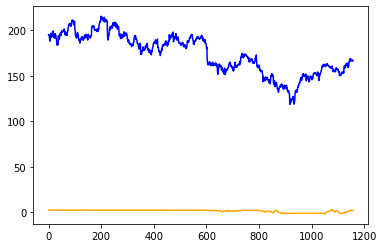

In [10]:
plt.plot(truth, 'b')
plt.plot(predict, 'orange')
plt.savefig(os.path.join(root, "results", date_time, "origin.png"))
plt.show()

In [11]:
predict = np.reshape(predict, (1, -1))
predict = np.squeeze(normalize(np.array(predict)))
truth = np.reshape(truth, (1, -1))
truth = np.squeeze(normalize(np.array(truth)))

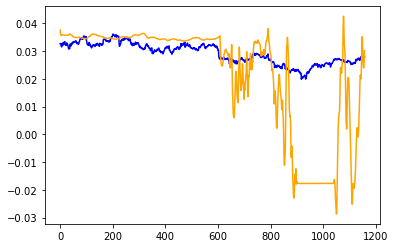

In [12]:
plt.plot(truth, 'b')
plt.plot(predict, 'orange')
plt.savefig(os.path.join(root, "results", date_time, "normalize.png"))
plt.show()